<a href="https://colab.research.google.com/github/AhmedSamir899/data-analysis-project/blob/main/DataAnalytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attributes:

Rank: Ranking of overall sales

Name: Name of the game

Platform: Console or platform of the game release

Year: Year of the game's release

Genre: Genre of the game

Publisher: Publisher of the game

NA_Sales: Sales figures for North America (in millions)

EU_Sales: Sales figures for Europe (in millions)

JP_Sales: Sales figures for Japan (in millions)

Other_Sales: Sales figures for other regions (in millions)

Global_Sales: Total sales figures for the game (in millions)

# The objective:

# The dataset contains information on video game sales from around the world.
# The objective of this dataset is to analyze the sales figures of different video games and 
# identify the factors that influence their popularity and success.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
# Load dataset into a Pandas dataframe
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
#to show data types of the cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# Check for missing values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Drop any rows with missing values
df.dropna(inplace=True)
df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# Convert non-numeric data to numeric format
df['Year'] = df['Year'].astype(int)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


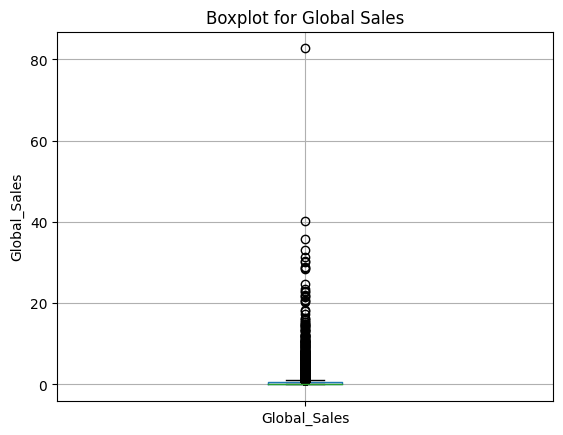

In [ ]:
# create a boxplot for Age column
df.boxplot(column=['Global_Sales'])

# set the title and labels
plt.title('Boxplot for Global Sales')
plt.ylabel('Global_Sales')

# show the plot
plt.show()

In [ ]:
# Remove outliers
q1 = df['Global_Sales'].quantile(0.25)
q3 = df['Global_Sales'].quantile(0.75)
iqr = q3 - q1
df = df[(df['Global_Sales'] >= (q1 - 1.5 * iqr)) & (df['Global_Sales'] <= (q3 + 1.5 * iqr))]

df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1847,1849,Guitar Hero 5,PS3,2009,Misc,Activision,0.53,0.40,0.00,0.17,1.10
1848,1850,Megamania,2600,1981,Shooter,Activision,1.03,0.06,0.00,0.01,1.10
1849,1851,Medal of Honor: Airborne,X360,2007,Shooter,Electronic Arts,0.45,0.53,0.01,0.12,1.10
1850,1852,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,Nintendo,0.52,0.33,0.17,0.08,1.10
1851,1853,Jungle Hunt,2600,1982,Platform,Atari,1.03,0.06,0.00,0.01,1.10
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


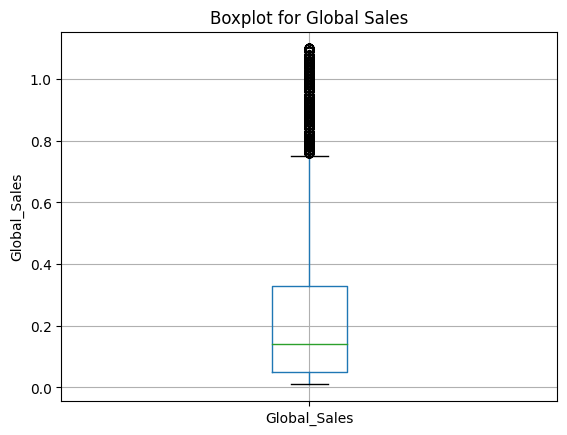

In [ ]:
# create a boxplot for Age column
df.boxplot(column=['Global_Sales'])

# set the title and labels
plt.title('Boxplot for Global Sales')
plt.ylabel('Global_Sales')

# show the plot
plt.show()

In [ ]:
#to show the statistics of the data set
df.describe()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,14465.000000,14465.000000,14465.000000,14465.000000,14465.000000,14465.000000,14465.000000
mean,9220.160318,2006.620532,0.116525,0.057202,0.040813,0.019475,0.234321
std,4256.401839,5.598661,0.154818,0.097789,0.105106,0.035941,0.246890
min,1849.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,5529.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.050000
50%,9225.000000,2008.000000,0.060000,0.020000,0.000000,0.010000,0.140000
75%,12906.000000,2010.000000,0.160000,0.070000,0.030000,0.020000,0.330000
max,16600.000000,2020.000000,1.030000,0.980000,1.100000,0.740000,1.100000


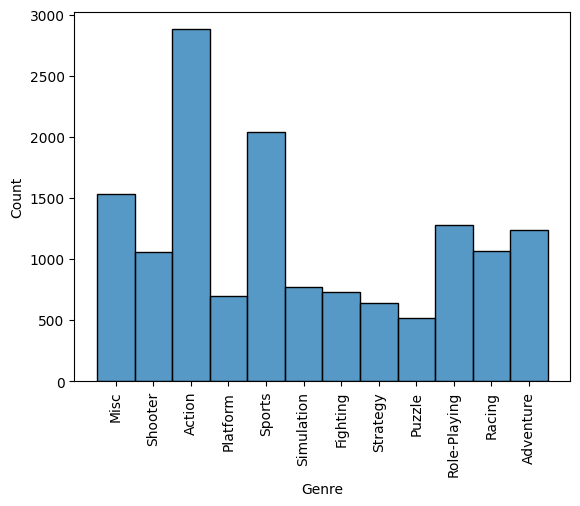

In [ ]:
# Data exploration using visualization
sns.histplot(x=df['Genre'], bins=12)
plt.xticks(rotation=90)
plt.show()


**Observations:**

From the histogram we can see that the most frequently  made genre is the Action genre, the second frequently made is the Sports Genre and the Third frequently made is the Misc Genre.

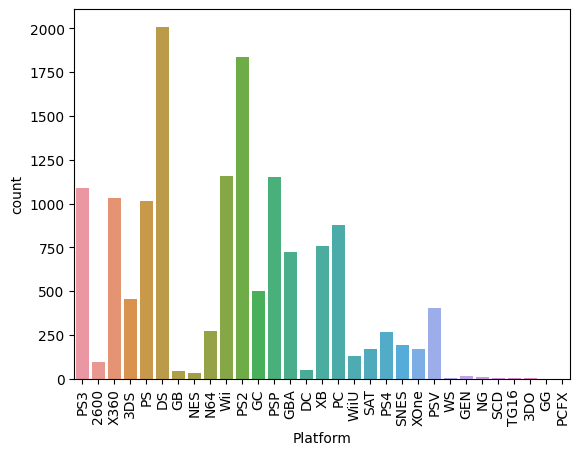

In [ ]:
sns.countplot(x='Platform', data=df)
plt.xticks(rotation=90)
plt.show()


**Observations:**

The countplot of Platform shows that the most popular platforms for releasing games are PS2, DS, and PS3, in that order.
This is consistent with the time period covered by the dataset, as these were some of the most popular consoles of that era.

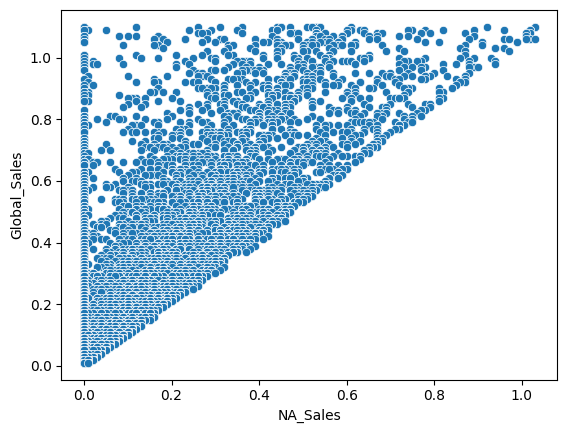

In [ ]:
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=df)
plt.show()


Observations:

The scatterplot of NA Sales and Global Sales shows a generally positive correlation between the two variables, with a few notable outliers.
This is consistent with the observation we made earlier about a correlation between sales figures in different regions.

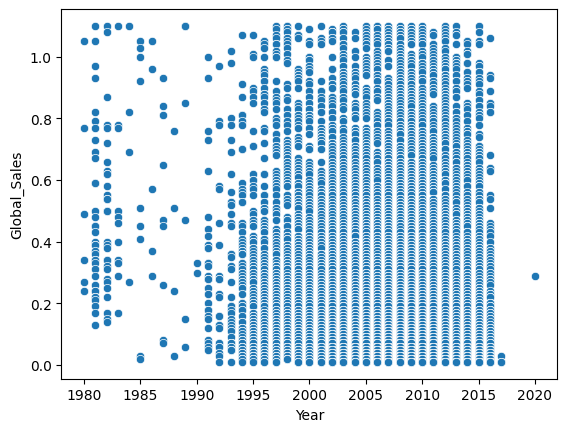

In [ ]:
sns.scatterplot(x='Year', y='Global_Sales', data=df)
plt.show()

**Observations:**

As we got Into the to later years the Video game industry sales got more and more popular and bigger.


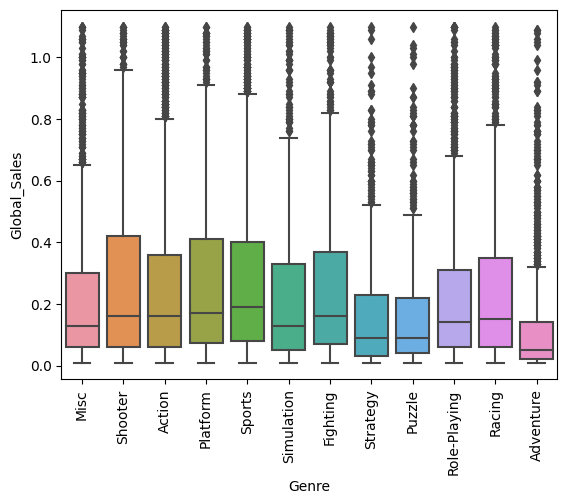

In [ ]:
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Prepare the dataset for machine learning
X = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre']]
y = df['Global_Sales']

In [ ]:
# Convert categorical data to dummy variables
df = pd.get_dummies(X, columns=['Genre'],drop_first=True)
df


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
1847,2009,0.53,0.40,0.00,0.17,0,0,1,0,0,0,0,0,0,0,0
1848,1981,1.03,0.06,0.00,0.01,0,0,0,0,0,0,0,1,0,0,0
1849,2007,0.45,0.53,0.01,0.12,0,0,0,0,0,0,0,1,0,0,0
1850,2015,0.52,0.33,0.17,0.08,0,0,0,0,0,0,0,0,0,0,0
1851,1982,1.03,0.06,0.00,0.01,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,2002,0.01,0.00,0.00,0.00,0,0,0,1,0,0,0,0,0,0,0
16594,2003,0.01,0.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0
16595,2008,0.00,0.00,0.00,0.00,0,0,0,0,0,1,0,0,0,0,0
16596,2010,0.00,0.01,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Split dataset into training and testing sets
X_train, X_test ,y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)



In [ ]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions and calculate the mean squared error
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)
R2 = r2_score(y_test, y_pred)
print("Linear Regression r2_score:", R2)

Linear Regression MSE: 2.7121728701642484e-05
Linear Regression r2_score: 0.9995667459271296


In [ ]:
# Decision trees
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions and calculate the mean squared error
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Decision Tree MSE:", mse)
R2 = r2_score(y_test, y_pred)
print("Decision Tree r2_score:", R2)

Decision Tree MSE: 0.0009688131342034453
Decision Tree r2_score: 0.984523765396318


In [ ]:
# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors Regression MSE:", mean_squared_error(y_test, y_pred_knn))
print("K-Nearest Neighbors Regression r2_score:", r2_score(y_test, y_pred_knn))

K-Nearest Neighbors Regression MSE: 0.011566256481161425
K-Nearest Neighbors Regression r2_score: 0.8152356811966781
